### Project Title

In [2]:
project_title="Titanic case"

# 1 system setup


**Credits :**   
https://github.com/Kaushik-Varma/Marketing_Data_Analysis   
https://towardsdatascience.com/exploratory-data-analysis-eda-python-87178e35b14   
https://seaborn.pydata.org/generated/seaborn.boxplot.html   


**Working directory setup**
* **/Data/** for all data related maps
* **/Data/raw/** for all raw incoming data
* **/Data/clean/** for all clean data to be used during analysis
* **/Data/staging/** for all data save during cleaning 
* **/Data/temp/** for all tempral data saving 
* **/Figs/temp/** for all tempral data saving 
* **/Docs/** reference documentation
* **/Results/** reference documentation
* **/Code/** reference documentation


**references:**
https://docs.python-guide.org/writing/structure/



Setup packages required for analysis


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline


Set working directories 

In [4]:
print("Current working directory: {0}".format(os.getcwd()))


Current working directory: C:\Users\jesse\hva\Data Science groep 3 - General\Titanic_case\uitwerking


Code below created project structure

# 2 Import data

show contents of working directory

In [5]:
train_df = pd.read_csv('01_train.csv')

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test_df = pd.read_csv('test.csv')

In [8]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 3 Exploratory Data Analysis

## 3.1 inspectie van variabelen 

In [9]:
print(train_df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


## 3.2 EDA per dataframe

Eerst kijken naar de veldnamen en data types

In [10]:
train_df.shape

(891, 12)

In [11]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Het valt op dat er waarden missen in de columns age cabin en embarked.
De column Sex zou omgezet kunnen worden naar het data type int waar: 0 = vrouw en man = 1.
Een ticket bestaat altijd uit cijfers, dus deze column zou van het data type int kunnen zijn.
De embarked column zou omgezet kunnen worden naar het data type string.



Dan kijken naar de statistieken van alle kolommen

In [13]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


sommige kolommen worden niet getoond

In [14]:
pd.set_option("display.max_columns",       None)

In [15]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3.2.1 kolommen splitsen / verwijderen / hernoemen / 

**verwijderen**

In [16]:
# Drop the customer id as it is of no use.
#train_df.drop('Name', axis = 1, inplace = True)
#train_df.drop('Ticket', axis = 1, inplace = True)
#train_df.drop('PassengerId', axis = 1, inplace = True)
#train_df.drop('Cabin', axis = 1, inplace = True)

**Resultaat** 

In [17]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Dit is een mooi moment om de data op te slaan in de staging map
De data is nog niet schoon maar wel al bewerkt, dus niet in de clean map opslaan, 

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html
DataFrame.copy(deep=True)[source]
Make a copy of this object’s indices and data.

When deep=True (default), a new object will be created with a copy of the calling object’s data and indices. Modifications to the data or indices of the copy will not be reflected in the original object (see notes below).

In [18]:
train_df_staging = train_df.copy()

## 3.2.2 Datatypes rechtzetten

In [19]:
#train_df["Sex"].replace({"female": 0, "male": 1}, inplace=True)
train_df["Sex"].fillna(0, inplace=True)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


De waarden in kolom Sex zijn veranderd in 0 voor vrouw en 1 voor man.

## 3.2.4 generieke verkenning

In [20]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
print(train_df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [22]:
print(train_df.nunique(axis=0))

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64


Wat valt op:
- Er zijn drie verschillende klassen;
- Er zijn 88 verschillende leeftijden;
- Er zijn 7 verschillende waarden in de kolom SiblingSpouse;
- Er zijn 7 verschillende waarden in de kolom ParentsChildren;
- Er zijn 248 verschillende waarden in de kolom fare;

Welke relaties willen we toetse
* §

In [23]:
# Checking the missing values
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## 3.2 univariate data analyse

#### Sex

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

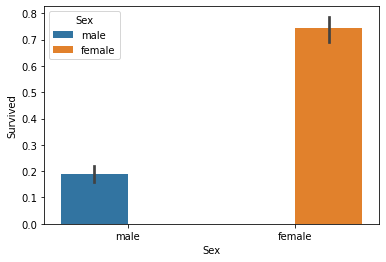

In [24]:
#train_df.Survived.hist(bins=20)
sns.barplot(x="Sex", y="Survived", hue="Sex", data=train_df)

C:\Users\jesse\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


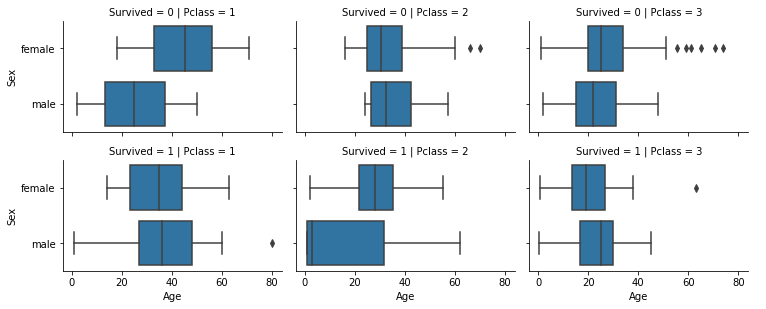

In [84]:
grid = sns.FacetGrid(train_df, col='Pclass', row='Survived', height=2.2, aspect=1.6)
grid.map(sns.boxplot, 'Age', 'Sex')
grid.add_legend();

<AxesSubplot:>

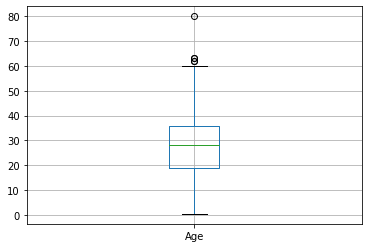

In [79]:
overleden = train_df[train_df['Survived'] == 1]
overleden.boxplot(column=["Age"])

#### Klassen

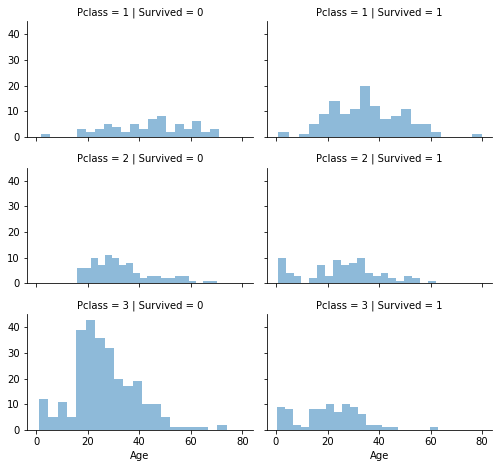

In [64]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)

In [ ]:
# Let's calculate the percentage of each job status category.
df_Marketing_Analysis.job.value_counts(normalize=True)

In [ ]:
#plot the bar graph of percentage job categories
df_Marketing_Analysis.job.value_counts(normalize=True).plot.bar()
plt.show()

In [ ]:
# boxplot
ax = sns.boxplot(x=train_df[""])
#ax = sns.swarmplot(x=df_Marketing_Analysis["Wage"])


In [ ]:
# violin plot
ax = sns.swarmplot(x=df_Marketing_Analysis["pdays"])

## 3.3 multivariate data analysis

In [ ]:
#plot the scatter plot of balance and salary variable in data
plt.scatter(train_df.Pclass,train_df.Age)
plt.show()

In [ ]:
#plot the scatter plot of balance and age variable in data
df_Marketing_Analysis.plot.scatter(x="age",y="balance")
plt.show()

In [ ]:

#plot the pair plot of salary, balance and age in data dataframe.
sns.pairplot(data = df_Marketing_Analysis, vars=['Wage','balance','age'])
plt.show()

In [ ]:
sns.kdeplot(data=df_Marketing_Analysis, x="age")

In [ ]:
sns.kdeplot(data=df_Marketing_Analysis, x="Wage", hue="education")

In [ ]:
sns.boxplot(data=df_Marketing_Analysis, x="Wage", hue="education")

In [ ]:
# Creating a matrix using age, salry, balance as rows and columns
df_Marketing_Analysis[['age','Wage','balance']].corr()

In [ ]:
#plot the correlation matrix of salary, balance and age in data dataframe.
sns.heatmap(train_df[['Survived', 'Age','Sex', 'Pclass', 'SibSp', 'Parch']].corr(), annot=True, cmap = 'Reds')
plt.show()

In [ ]:
df_Marketing_Analysis.columns

In [ ]:
pd.crosstab(index = df_Marketing_Analysis.marital,
           columns = df_Marketing_Analysis.job)
            

In [ ]:
pd.crosstab(index = df_Marketing_Analysis.marital,
           columns = [df_Marketing_Analysis.job,df_Marketing_Analysis.education])
            

## Conclusion EDA

kan per kolom

kan per type fout/issue

outliers

opslaan data

# 4. Cleaning your dataset


## Removing Redundant variables

In [ ]:
df_cleaned = df_Marketing_Analysis.copy()

In [ ]:
df_Marketing_Analysis.columns

In [ ]:
df_Marketing_Analysis.duplicated()

In [ ]:
df_Marketing_Analysis.duplicated().sum()

Duplicaten zoeken op specifieke kolommen


In [ ]:
df_Marketing_Analysis.duplicated(subset=['age','salary','balance','marital'], keep='first')

In [ ]:
df_Marketing_Analysis.duplicated(subset=['age','salary','balance','marital'], keep='first').sum()

## Removing Outliers

 ## outlier Detection

z-scores


 ## outliers verwijderen / corrigeren

## 4.2 Corrigeren van technisch onmogelijke waardes

* spelfouten
* emailadres zonder @ 
* datum format verkeerd
* discontinuiteit sprong in tijds (bijv meter electrische lader / missendetijd) 

## 4.2 data inputation of missing values

**Missing Values**

If there are missing values in the Dataset before doing any statistical analysis, we need to handle those missing values.
There are mainly three types of missing values.
* MCAR(Missing completely at random): These values do not depend on any other features.
* MAR(Missing at random): These values may be dependent on some other features.
* MNAR(Missing not at random): These missing values have some reason for why they are missing.

Let’s see which columns have missing values in the dataset.

credits: https://towardsdatascience.com/exploratory-data-analysis-eda-python-87178e35b14


In [ ]:
print(train_df.isnull().sum())

In de kolom age, cabin en embarked ontbreken er waarden.
In de kolom age en embarked kunnen we de waarden opvullen door de mediaan en modus.

In [ ]:
print(train_df["Age"].median())
print(train_df["Embarked"].mode())

In [ ]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
train_df.info()

# 5 Feature engineering

# 6 Building a model

# 7 Testing the model on the test dataset

# 8 Deploy model